In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as K
from keras.models import *
from keras import backend as K
from keras.layers import *
import gc

Using TensorFlow backend.


In [2]:
#load ECG dataset
df = pd.read_csv('data/oof.csv',index_col=0,header=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.74538,0.40512,0.128420,0.099474,0.114200,0.103230,0.105870,0.106610,0.112800,0.127750,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.74866,0.72859,0.383160,0.197020,0.045909,0.076691,0.081215,0.079596,0.074503,0.074752,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.82901,0.59209,0.016027,0.053118,0.098701,0.094618,0.081813,0.091729,0.088893,0.091431,...,0.000396,-0.000277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.83462,0.52939,0.070495,0.168920,0.103080,0.118290,0.091153,0.102890,0.094212,0.098071,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.83817,0.82017,0.297060,0.246950,0.201970,0.244970,0.217150,0.232860,0.220050,0.223310,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
#define X/Y
X = df.iloc[:,:128].values
Y = df.iloc[:,128].values
X = X.reshape(X.shape[0],128,1)


gc.collect()
X.shape

(100, 128, 1)

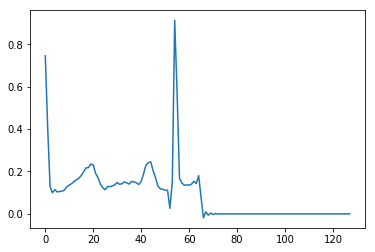

In [4]:
plt.plot(X[0,:,0])

In [35]:
output_size=(1) #input shape of the data
input_size=(128,1) #output shape of the data
seed = 10
_fold = 5

pred = np.zeros((100, 1))
for seed in range(1,n_seed+1):
    for _fold in range(n_fold):
        K.clear_session()
        model = ECG_rec(input_size,output_size)
        model.load_weights('models_weights/ecg_recognizer/model-ECG_rec-seed{}-fold{}.h5'.format(seed,_fold))
        pred += model.predict(X)
        K.clear_session()
        del model
        gc.collect()

C:\Users\dima9\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("av...)`


In [36]:
np.abs(Y - (pred/50)[:,0]).mean()

0.02546184323058817